In [128]:
import pandas as pd
import numpy as np
import matplotlib as plot

In [18]:
covid_df = pd.read_csv('datasets/all-states-history.csv')

In [126]:
most_recent = covid_df.loc[covid_df['date'] > '2020-11-18'].sort_values('state')
filtered_results = most_recent[['state', 'totalTestsViral']]
us_territories = ['AS', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI', 'UM', 'DC']
for territory in us_territories:
    filtered_results = filtered_results[filtered_results['state'] != territory]
display(filtered_results)

,state,totalTestsViral
0,AK,898799.0
1,AL,1496717.0
2,AR,1552450.0
4,AZ,NaN
5,CA,21552528.0
6,CO,NaN
7,CT,2890524.0
9,DE,NaN
10,FL,10095680.0
11,GA,4010676.0


In [50]:
political_df = pd.read_csv('datasets/2020_Election_Results.csv').sort_values('state')
display(political_df)

,state,vote
1,AK,rep
0,AL,rep
3,AR,rep
2,AZ,dem
4,CA,dem
5,CO,dem
6,CT,dem
7,DE,dem
8,FL,rep
9,GA,dem


In [127]:
frames = [filtered_results.sort_values('state'), political_df.sort_values('state')]
merged_df = pd.merge(filtered_results, political_df, left_on='state', right_on='state', how='left')
display(merged_df)

,state,totalTestsViral,vote
0,AK,898799.0,rep
1,AL,1496717.0,rep
2,AR,1552450.0,rep
3,AZ,NaN,dem
4,CA,21552528.0,dem
5,CO,NaN,dem
6,CT,2890524.0,dem
7,DE,NaN,dem
8,FL,10095680.0,rep
9,GA,4010676.0,dem


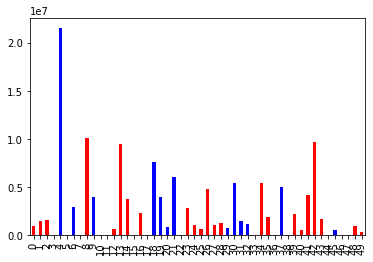

In [140]:
merged_df['totalTestsViral'].plot(kind='bar', color=(merged_df['vote'] == 'dem').map({True: 'b', False: 'r'}))